In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Funciones de activacion en TensorFlow

Las dos funciones se calculan por separado porque al juntarlas en el mismo bucle for, generan distorsión en los datos de salida

## Función Sigmoide

In [27]:
# Configurar las semillas para reproducibilidad
tf.random.set_seed(2019)
np.random.seed(2019)

# Tamaño del lote
batch_size = 50



# Definir variables
a1 = tf.Variable(tf.random.normal(shape=[1, 1]))
b1 = tf.Variable(tf.random.normal(shape=[1, 1]))



# Datos de entrada
x = np.random.normal(loc=5, scale=0.25, size=1000)
x = np.array(x, dtype = "float32")

# Funciones de activación
def sigmoid_activation(x_data):
    return tf.sigmoid(tf.add(tf.matmul(x_data, a1), b1))



# Objetivo
target = 0.75

# Optimizador
optimizer1 = tf.optimizers.SGD(learning_rate=0.08)


# Listas para almacenar las pérdidas y activaciones
loss_vect_sigmoid = []
activ_sigmoid = []


# Entrenamiento
for i in range(400):
    rand_idx = np.random.choice(len(x), size=batch_size)
    x_vals = np.transpose([x[rand_idx]])

    # Calcular y almacenar pérdidas y activaciones usando GradientTape
    with tf.GradientTape() as tape1:
        sigmoid_output = sigmoid_activation(x_vals)
        loss1 = tf.reduce_mean(tf.square(sigmoid_output - target))

    gradients1 = tape1.gradient(loss1, [a1, b1])
    optimizer1.apply_gradients(zip(gradients1, [a1, b1]))
    loss_vect_sigmoid.append(loss1.numpy())
    activ_sigmoid.append(np.mean(sigmoid_output.numpy()))



# Función Relu 

In [28]:
# Configurar las semillas para reproducibilidad
tf.random.set_seed(2019)
np.random.seed(2019)

# Tamaño del lote
batch_size = 50

# Definir variables
a2 = tf.Variable(tf.random.normal(shape=[1, 1]))
b2 = tf.Variable(tf.random.normal(shape=[1, 1]))

# Datos de entrada
x = np.random.normal(loc=5, scale=0.25, size=1000)
x = np.array(x, dtype = "float32")

# Funciones de activación
def relu_activation(x_data):
    return tf.nn.relu(tf.add(tf.matmul(x_data, a2), b2))

# Objetivo
target = 0.75

# Optimizador

optimizer2 = tf.optimizers.SGD(learning_rate=0.01)

# Listas para almacenar las pérdidas y activaciones
loss_vect_relu = []
activ_relu = []

# Entrenamiento
for i in range(400):
    rand_idx = np.random.choice(len(x), size=batch_size)
    x_vals = np.transpose([x[rand_idx]])

    # Calcular y almacenar pérdidas y activaciones usando GradientTape

    with tf.GradientTape() as tape2:
        relu_output = relu_activation(x_vals)
        loss2 = tf.reduce_mean(tf.square(relu_output - target))

    gradients2 = tape2.gradient(loss2, [a2, b2])
    optimizer2.apply_gradients(zip(gradients2, [a2, b2]))
    loss_vect_relu.append(loss2.numpy())
    activ_relu.append(np.mean(relu_output.numpy()))

# Gráficas

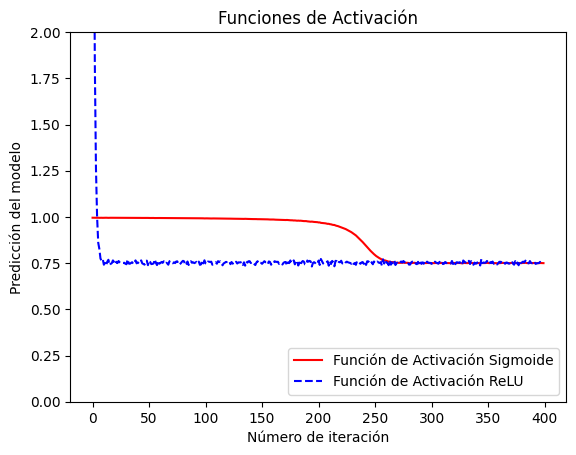

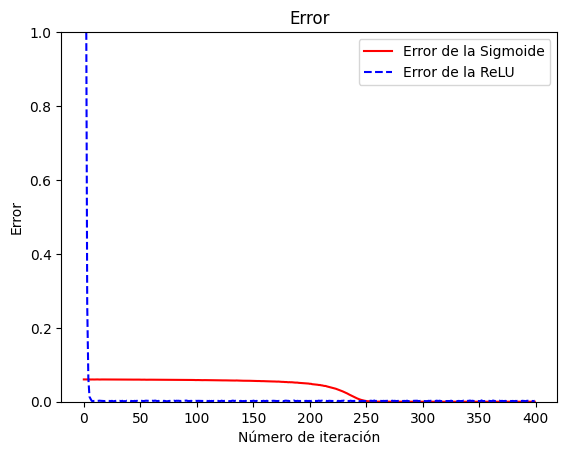

In [30]:
# Graficar resultados
plt.plot(activ_sigmoid, 'r-', label="Función de Activación Sigmoide")
plt.plot(activ_relu, 'b--', label="Función de Activación ReLU")
plt.ylim([0.0, 2.0])
plt.title("Funciones de Activación")
plt.xlabel("Número de iteración")
plt.ylabel("Predicción del modelo")
plt.legend(loc="lower right")
plt.show()

plt.plot(loss_vect_sigmoid, 'r-', label="Error de la Sigmoide")
plt.plot(loss_vect_relu, 'b--', label="Error de la ReLU")
plt.ylim([0.0, 1.0])
plt.title("Error")
plt.xlabel("Número de iteración")
plt.ylabel("Error")
plt.legend(loc="upper right")
plt.show()


Se observa como la función relu converge mas rápido que la funcion sigmoide